## Imports

In [1]:
import os

import matplotlib.pyplot as plt

from packages.mining import open_data
from packages.plotting import plot_data
from packages.computing import thresholds

directory = os.chdir("/home/leopaul/Climate_Change_PO/")

In [2]:
sr = open_data(
    "data/FRNOR.RR2025010565429.PPDH.KEYuAAuu91dxAxu2BfU7xuA.csv",
    "TN"
)

/home/leopaul/Climate_Change_PO/packages/mining.py:12: DtypeWarning: Columns (2,3,6,7,9,10,11,13,17,18,19,21,23,24,25,27,29,40,41,45,49,51,53,55,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';', encoding='utf-8')


DatetimeIndex(['1930-08-01 00:00:00', '1930-08-01 03:00:00',
               '1930-08-01 06:00:00', '1930-08-01 09:00:00',
               '1930-08-01 12:00:00', '1930-08-01 15:00:00',
               '1930-08-01 18:00:00', '1930-08-01 21:00:00',
               '1930-08-02 00:00:00', '1930-08-02 03:00:00',
               ...
               '2025-06-28 03:00:00', '2025-06-28 06:00:00',
               '2025-06-28 09:00:00', '2025-06-28 12:00:00',
               '2025-06-28 15:00:00', '2025-06-28 18:00:00',
               '2025-06-28 21:00:00', '2025-06-29 00:00:00',
               '2025-06-29 03:00:00', '2025-06-29 06:00:00'],
              dtype='datetime64[ns]', name='DATE', length=194506, freq=None)


## General view

In [3]:
sr_stdy = sr.loc["1997-02-01 00:00:00":"2024-12-31 23:00:00"]
dates_nan = sr_stdy[sr_stdy.isna()].index
print(dates_nan)

DatetimeIndex(['1999-11-06 03:00:00', '1999-11-06 06:00:00',
               '2005-06-26 06:00:00', '2005-08-08 21:00:00',
               '2007-03-15 12:00:00', '2007-03-15 15:00:00',
               '2007-06-21 15:00:00', '2012-02-04 03:00:00',
               '2013-07-18 00:00:00', '2013-07-18 03:00:00',
               ...
               '2020-05-10 21:00:00', '2020-05-11 00:00:00',
               '2020-05-11 03:00:00', '2020-05-11 06:00:00',
               '2020-05-11 09:00:00', '2020-06-09 18:00:00',
               '2020-06-09 21:00:00', '2021-01-25 00:00:00',
               '2021-01-25 03:00:00', '2024-05-28 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=151, freq=None)


In [4]:
sr_d = sr_stdy.resample("D").min()
dates_nan = sr_d[sr_d.isna()].index
nan_by_year = sr_d.isna().groupby(sr_d.index.year).sum()
nan_by_year = nan_by_year[nan_by_year != 0]
print(nan_by_year)
print(dates_nan)

DATE
2019    7
2020    1
Name: TN, dtype: int64
DatetimeIndex(['2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11',
               '2019-07-27', '2019-07-28', '2019-08-18', '2020-05-08'],
              dtype='datetime64[ns]', name='DATE', freq=None)


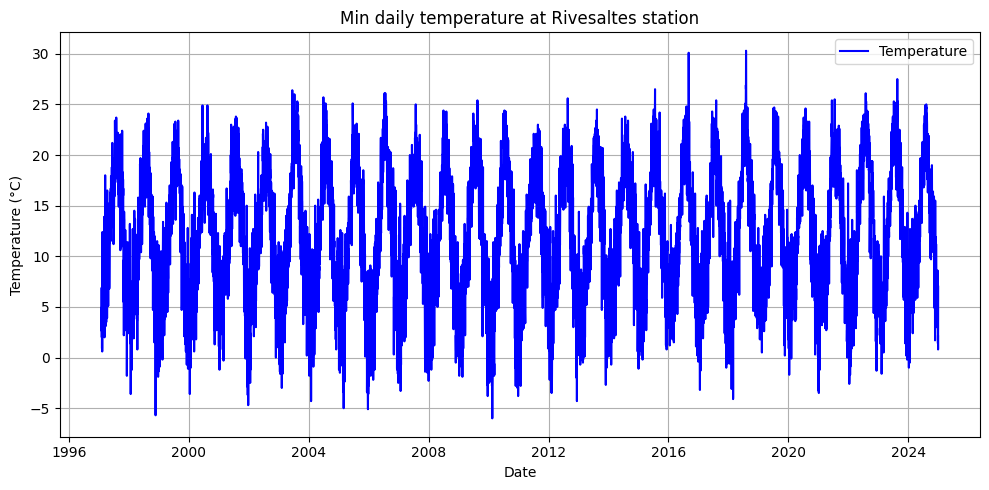

In [5]:
plot_data(
    sr_d,
    "Temperature",
    "Min daily temperature",
    "min_daily_temp_1997_2024"
)

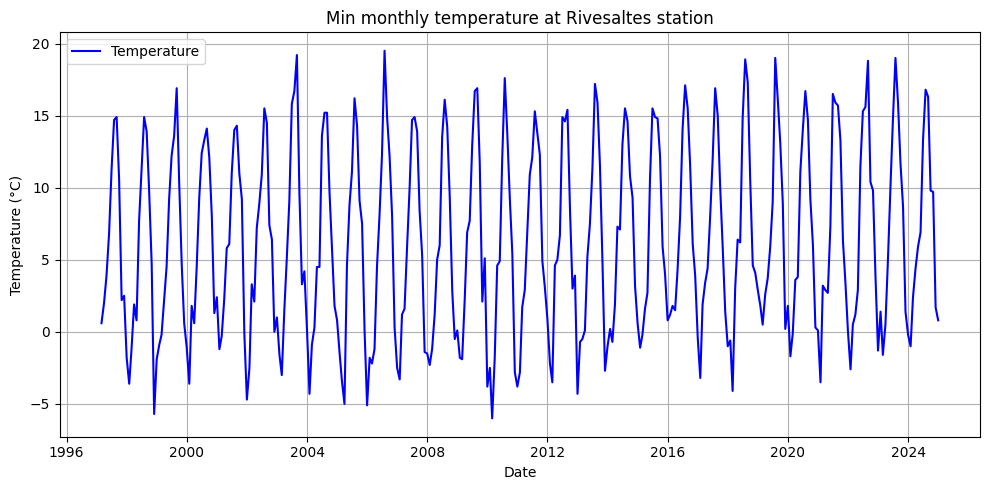

In [6]:
sr_m = sr_d.resample("ME").min()
plot_data(
    sr_m,
    "Temperature",
    "Min monthly temperature",
    "min_monthly_temp_1997_2024"
)

## Normal and quantiles fro 1997-2010 and 2011-2024

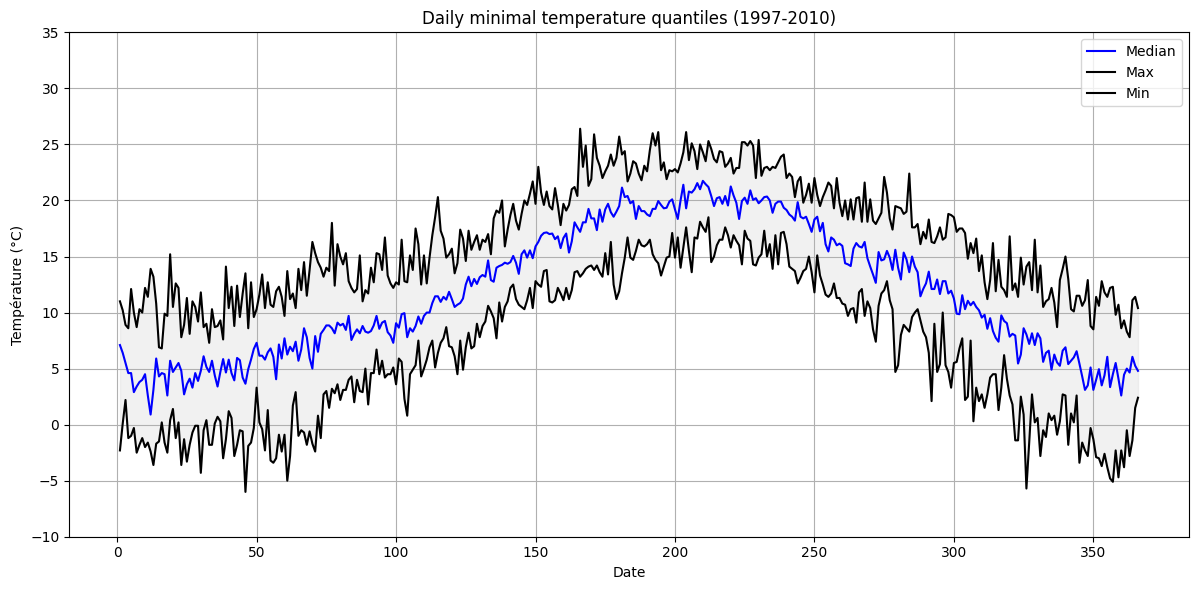

In [7]:
sr_frst = sr.loc["1997-02-01":"2010-12-31"]
sr_frst_d = sr_frst.resample("D").min()

dayofyear = sr_frst_d.index.dayofyear
sr_q50 = sr_frst_d.groupby(dayofyear).quantile(0.50)
sr_max = sr_frst_d.groupby(dayofyear).max()
sr_min = sr_frst_d.groupby(dayofyear).min()

plt.figure(figsize=(12, 6))
plt.plot(sr_q50.index, sr_q50, label="Median", color="blue")
plt.plot(sr_max.index, sr_max, label="Max", color="black")
plt.plot(sr_min.index, sr_min, label="Min", color="black")
plt.fill_between(sr_min.index, sr_min, sr_max, color="lightgray", alpha=0.3)
plt.legend()
plt.title("Daily minimal temperature quantiles (1997-2010)")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.grid(True)
plt.tight_layout()
plt.ylim(-10, 35)
plt.show()

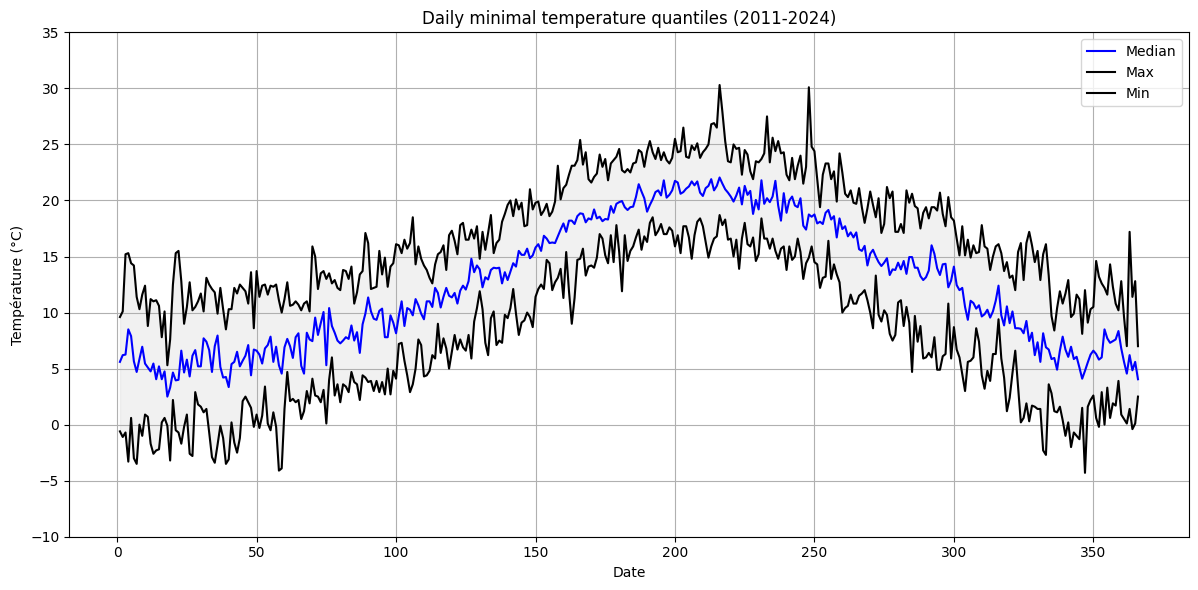

In [8]:
sr_snd = sr.loc["2011-01-01":"2024-12-31"]
sr_snd_d = sr_snd.resample("D").min()

dayofyear = sr_snd_d.index.dayofyear
sr_q50 = sr_snd_d.groupby(dayofyear).quantile(0.50)
sr_max = sr_snd_d.groupby(dayofyear).max()
sr_min = sr_snd_d.groupby(dayofyear).min()

plt.figure(figsize=(12, 6))
plt.plot(sr_q50.index, sr_q50, label="Median", color="blue")
plt.plot(sr_max.index, sr_max, label="Max", color="black")
plt.plot(sr_min.index, sr_min, label="Min", color="black")
plt.fill_between(sr_min.index, sr_min, sr_max, color="lightgray", alpha=0.3)
plt.legend()
plt.title("Daily minimal temperature quantiles (2011-2024)")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.grid(True)
plt.tight_layout()
plt.ylim(-10, 35)
plt.show()

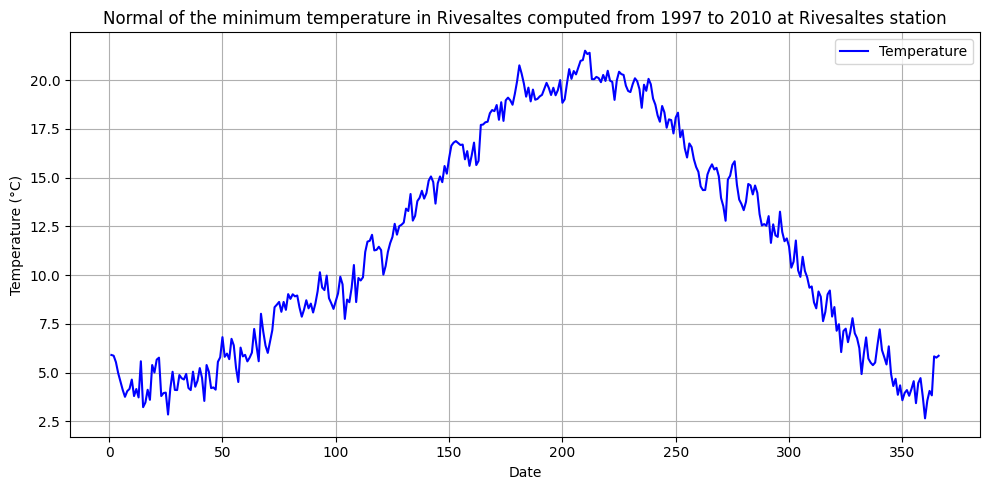

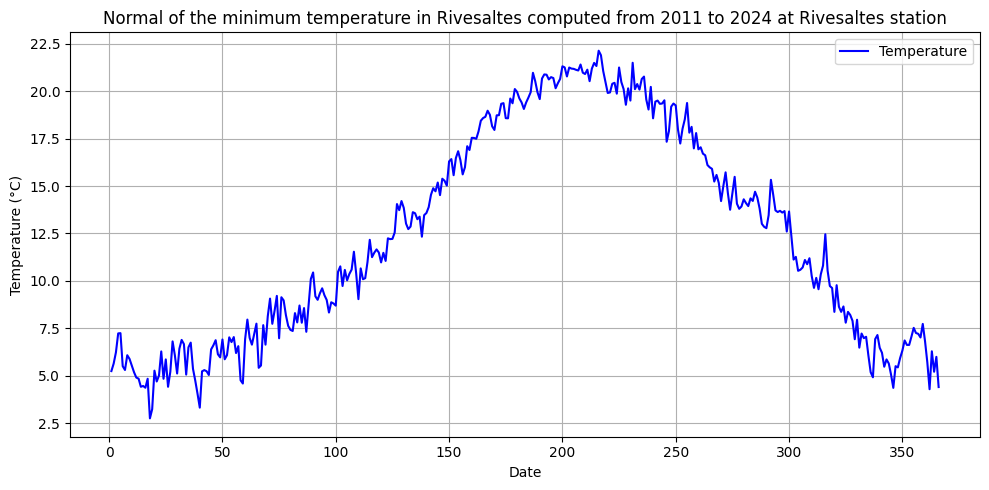

In [9]:
dayofyear = sr_frst_d.index.dayofyear
climato_frst = sr_frst_d.groupby(dayofyear).mean()
dayofyear = sr_snd_d.index.dayofyear
climato_sec = sr_snd_d.groupby(dayofyear).mean()

plot_data(
    climato_frst,
    "Temperature",
    "Normal of the minimum temperature in Rivesaltes computed from 1997 to 2010",
    "norm_min_temp_1997_2010"
)
plot_data(
    climato_sec,
    "Temperature",
    "Normal of the minimum temperature in Rivesaltes computed from 2011 to 2024",
    "norm_min_temp_2011_2024"
)

## Frequency of trespassing thresholds

### JJA

Numbre of days with T > 26°C for 1997-2010 : 3
The corresponding dates are : [Timestamp('2003-06-15 00:00:00'), Timestamp('2006-07-13 00:00:00'), Timestamp('2006-07-23 00:00:00')]
Numbre of days with T > 26°C for 2011-2024 : 8
The corresponding dates are : [Timestamp('2015-07-22 00:00:00'), Timestamp('2018-08-01 00:00:00'), Timestamp('2018-08-02 00:00:00'), Timestamp('2018-08-03 00:00:00'), Timestamp('2018-08-04 00:00:00'), Timestamp('2018-08-05 00:00:00'), Timestamp('2022-08-01 00:00:00'), Timestamp('2023-08-21 00:00:00')]


<Figure size 600x500 with 0 Axes>

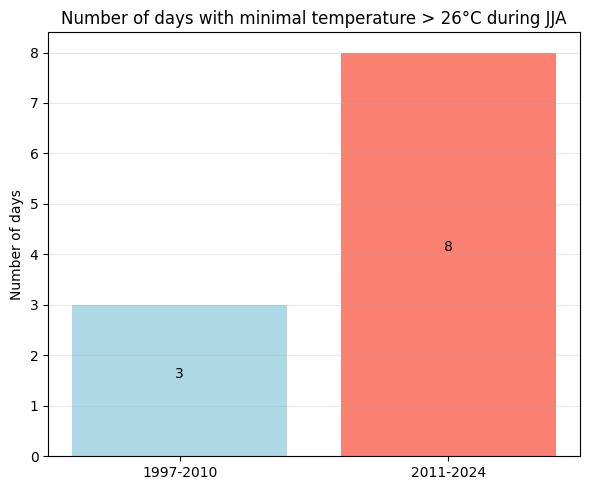

In [15]:
thresholds(
    months=[6, 7, 8],
    months_letter="JJA",
    first_sr=sr_frst_d,
    second_sr=sr_snd_d,
    threshold=26,
    data_type="minimal",
    periods=["1997-2010", "2011-2024"],
    study_sign=">"
)

### DJF

Numbre of days with T < 0°C for 1997-2010 : 121
The corresponding dates are : [Timestamp('1997-12-07 00:00:00'), Timestamp('1998-01-23 00:00:00'), Timestamp('1998-01-24 00:00:00'), Timestamp('1998-02-07 00:00:00'), Timestamp('1998-12-22 00:00:00'), Timestamp('1998-12-23 00:00:00'), Timestamp('1998-12-26 00:00:00'), Timestamp('1999-01-12 00:00:00'), Timestamp('1999-02-14 00:00:00'), Timestamp('1999-12-07 00:00:00'), Timestamp('1999-12-21 00:00:00'), Timestamp('1999-12-22 00:00:00'), Timestamp('2000-01-12 00:00:00'), Timestamp('2000-01-13 00:00:00'), Timestamp('2000-01-14 00:00:00'), Timestamp('2000-01-25 00:00:00'), Timestamp('2001-01-09 00:00:00'), Timestamp('2001-02-27 00:00:00'), Timestamp('2001-12-12 00:00:00'), Timestamp('2001-12-13 00:00:00'), Timestamp('2001-12-14 00:00:00'), Timestamp('2001-12-15 00:00:00'), Timestamp('2001-12-17 00:00:00'), Timestamp('2001-12-19 00:00:00'), Timestamp('2001-12-20 00:00:00'), Timestamp('2001-12-22 00:00:00'), Timestamp('2001-12-23 00:00:00'), Tim

<Figure size 600x500 with 0 Axes>

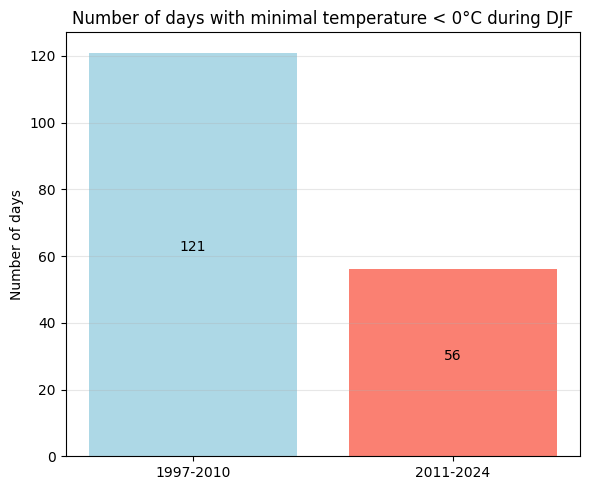

In [ ]:
thresholds(
    months=[12, 1, 2],
    months_letter="DJF",
    first_sr=sr_frst_d,
    second_sr=sr_snd_d,
    threshold=0,
    data_type="minimal",
    periods=["1997-2010", "2011-2024"],
    study_sign="<"
)